In [3]:
import json

CONFIG_FILE = "config.json"

with open(CONFIG_FILE, "r") as f:
    config = json.load(f)

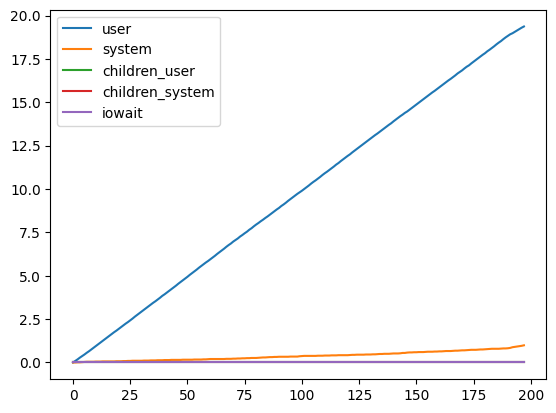

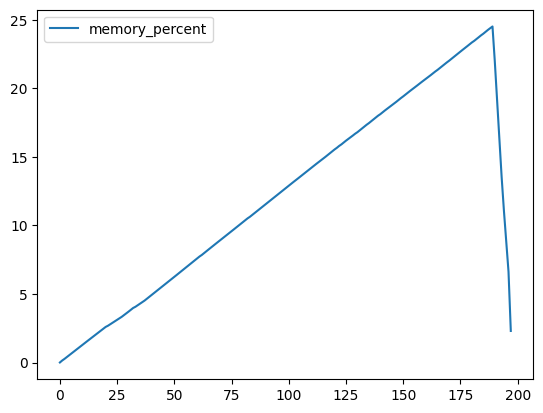

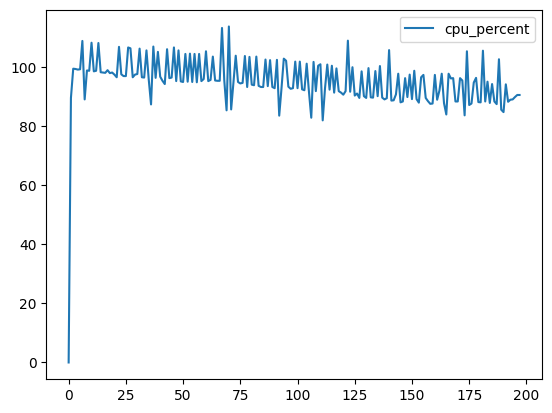

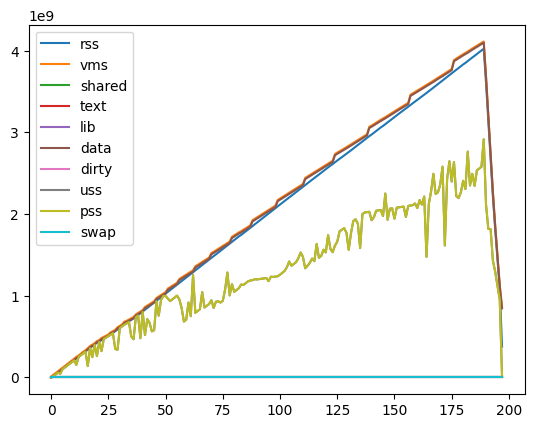

In [4]:
import pandas as pd

df = pd.read_csv(config['runner']['metrics']['out'])

groups = dict()
for col in map(lambda s: s.split('-'), df.columns):
    if col[0] in groups:
        groups[col[0]].append(col[-1])
    else:
        groups[col[0]] = [col[-1]]

dataframes = [df[[f'{key}-{value}' for value in values]].rename({f'{key}-{value}':value for value in values}, axis=1) if key != values[0] else df[[key]] for key, values in groups.items()]

for dataframe in dataframes:
    dataframe.plot()